# 1. Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import numpy as np
from numpy import mean
from numpy import absolute
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## 2. Exploring the Data

In [2]:
weather = pd.read_csv("Jeff_Weather.csv",index_col="date")
weather =weather.drop(weather.columns[0],axis=1)

In [3]:
weather

,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_speed_kmh,avg_sea_level_pres_hpa
date,,,,,,,
1973-01-02,Winter,-2.5,-7.2,3.3,0.0,12.6,1028.7
1973-01-04,Winter,-7.9,-11.1,-2.8,0.0,22.2,1025.5
1973-01-05,Winter,-10.9,-11.1,-10.0,0.0,14.6,1028.8
1973-01-07,Winter,-7.4,-9.4,-5.0,4.1,18.6,1031.9
1973-01-09,Winter,-14.8,-19.4,-10.0,0.0,16.2,1036.6
...,...,...,...,...,...,...,...
2023-08-24,Summer,30.4,25.6,36.0,0.0,11.8,1014.4
2023-08-25,Summer,30.8,25.6,36.7,0.0,9.0,1013.4
2023-08-26,Summer,24.5,22.2,27.0,10.8,12.2,1014.5


In [4]:
weather.index = pd.to_datetime(weather.index)

<AxesSubplot:>

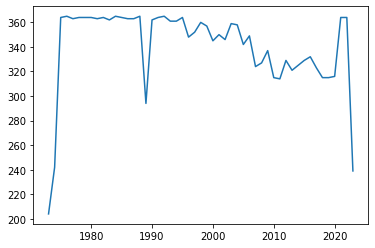

In [5]:
Yr=weather.index.year.value_counts().sort_index()
Yr.plot()

In [6]:
weather.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_speed_kmh,avg_sea_level_pres_hpa
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000
mean,12.667066,7.112248,18.461056,2.587635,15.184971,1017.052441
std,10.625961,10.353041,11.400028,8.074522,5.387027,6.660594
min,-25.000000,-28.900000,-21.700000,0.000000,0.400000,987.900000
25%,4.400000,-0.600000,10.000000,0.000000,11.200000,1012.800000
50%,13.900000,7.800000,20.000000,0.000000,14.400000,1016.700000
75%,21.900000,16.100000,27.800000,0.500000,18.400000,1020.900000
max,34.300000,28.900000,43.900000,150.900000,43.600000,1048.500000


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

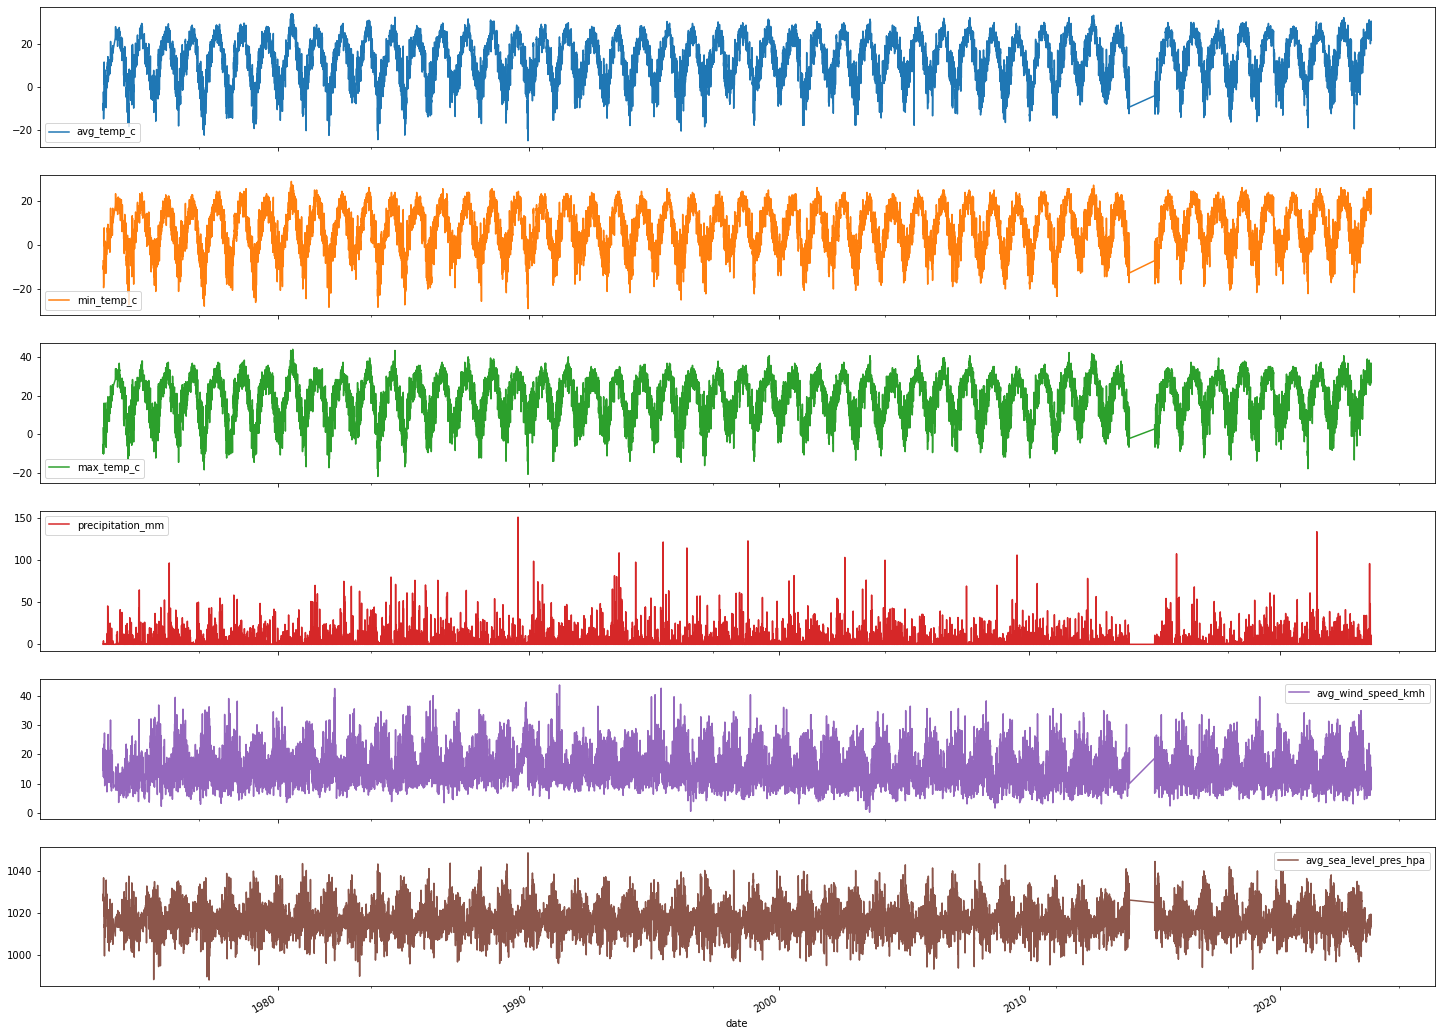

In [7]:
weather.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'avg_temp_c'}>,
        <AxesSubplot:title={'center':'min_temp_c'}>],
       [<AxesSubplot:title={'center':'max_temp_c'}>,
        <AxesSubplot:title={'center':'precipitation_mm'}>],
       [<AxesSubplot:title={'center':'avg_wind_speed_kmh'}>,
        <AxesSubplot:title={'center':'avg_sea_level_pres_hpa'}>]],
      dtype=object)

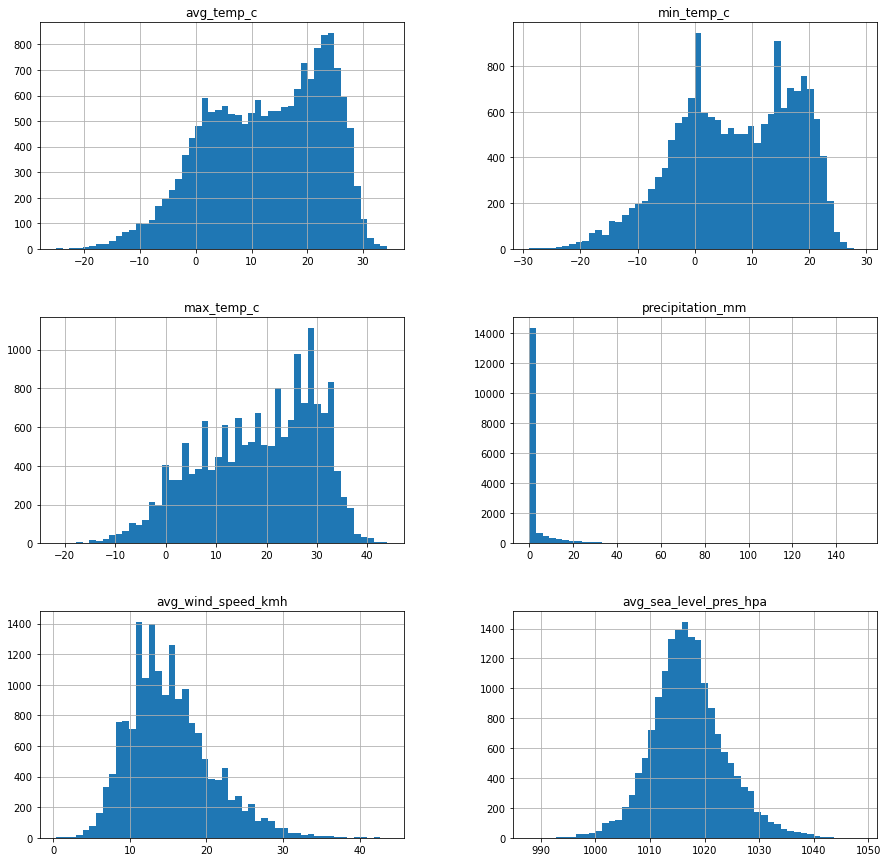

In [8]:
weather.hist(bins=50,figsize=(15,15))

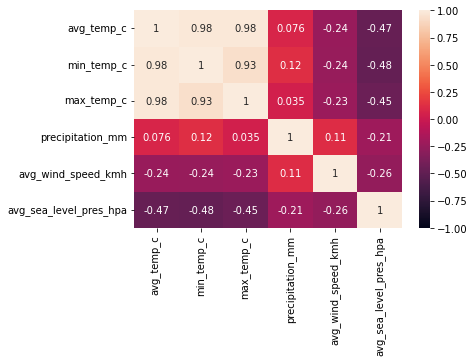

In [9]:
heatmap = sns.heatmap(weather.corr(), vmin=-1, vmax=1, annot=True)

## 3.1 Splitting the data

In [10]:
weather_y = weather.pop("avg_temp_c")
weather_x = weather[["min_temp_c", "max_temp_c", "precipitation_mm",\
                               "avg_wind_speed_kmh","avg_sea_level_pres_hpa"]].copy()

In [11]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25)

In [12]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_X shape: (12780, 5)
test_X shape: (4260, 5)
train_y shape: (12780,)
test_y shape: (4260,)


In [13]:
kf = KFold(n_splits=10)

# 4. Random Forest Model

In [14]:
score = cross_val_score(RandomForestRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
print(mean(absolute(score)))

Scores for each fold are: [-1.00369769 -0.79440348 -0.70411837 -0.78793212 -0.8508276  -0.96900358
 -1.83884156 -0.79414557 -0.78961268 -0.8382479 ]
0.9370830557293353


In [15]:
regr=RandomForestRegressor()
regr.fit(train_X,train_y)

RandomForestRegressor()

In [16]:
prediction=regr.predict(test_X)
np.mean(np.absolute(prediction-test_y))

0.6456849334898275

In [17]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [18]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.65
Residual sum of squares (MSE): 0.85
R2-score: 0.99


# 5. Decision Tree

In [19]:
score2 = cross_val_score(DecisionTreeRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score2}')
print(mean(absolute(score2)))

Scores for each fold are: [-1.71518779 -1.45850548 -1.37061815 -1.4029108  -1.72114241 -2.45234155
 -2.49886737 -1.52011737 -1.44827269 -1.44965571]
1.7037619327073554


In [20]:
regressor=DecisionTreeRegressor()
regressor.fit(train_X,train_y)

DecisionTreeRegressor()

In [21]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.885305164319245

In [22]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.99


In [23]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2))

Mean absolute error: 0.89
Residual sum of squares (MSE): 1.55
R2-score: 0.99


# 6. XGBoost 

In [24]:
score = cross_val_score(xgb.XGBRegressor(), train_X, train_y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
print(mean(absolute(score)))

Scores for each fold are: [-0.9522829  -0.83634474 -0.76884445 -0.79318339 -0.88244441 -0.83086897
 -1.8429591  -0.87026189 -0.81152228 -0.85857429]
0.9447286402627334


In [25]:
regressor=xgb.XGBRegressor()
regressor.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
prediction3=regressor.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.6468393285857604

In [27]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.99


In [28]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2))

Mean absolute error: 0.89
Residual sum of squares (MSE): 1.55
R2-score: 0.99


# 7. Results

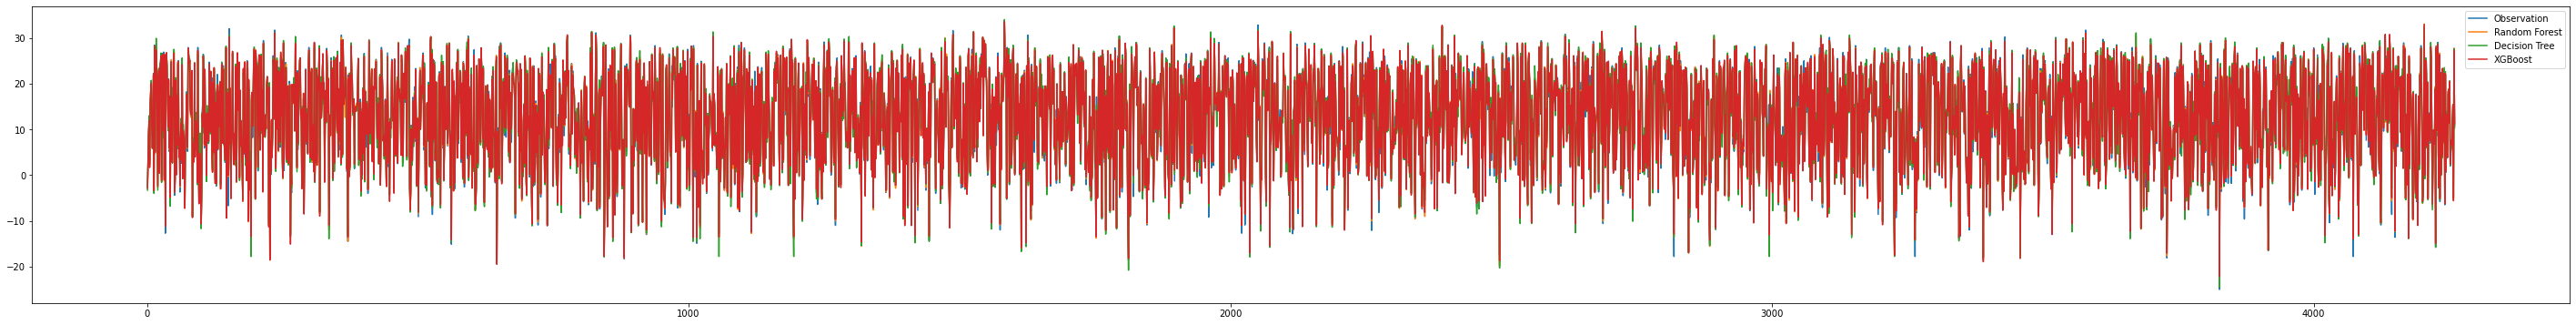

In [29]:
plt.figure(figsize=(50,6))
plt.plot(np.arange(1,4261),test_y,label = "Observation")
plt.plot(np.arange(1,4261),prediction,label = "Random Forest")
plt.plot(np.arange(1,4261),prediction2,label = "Decision Tree")
plt.plot(np.arange(1,4261),prediction3,label = "XGBoost")
plt.legend()

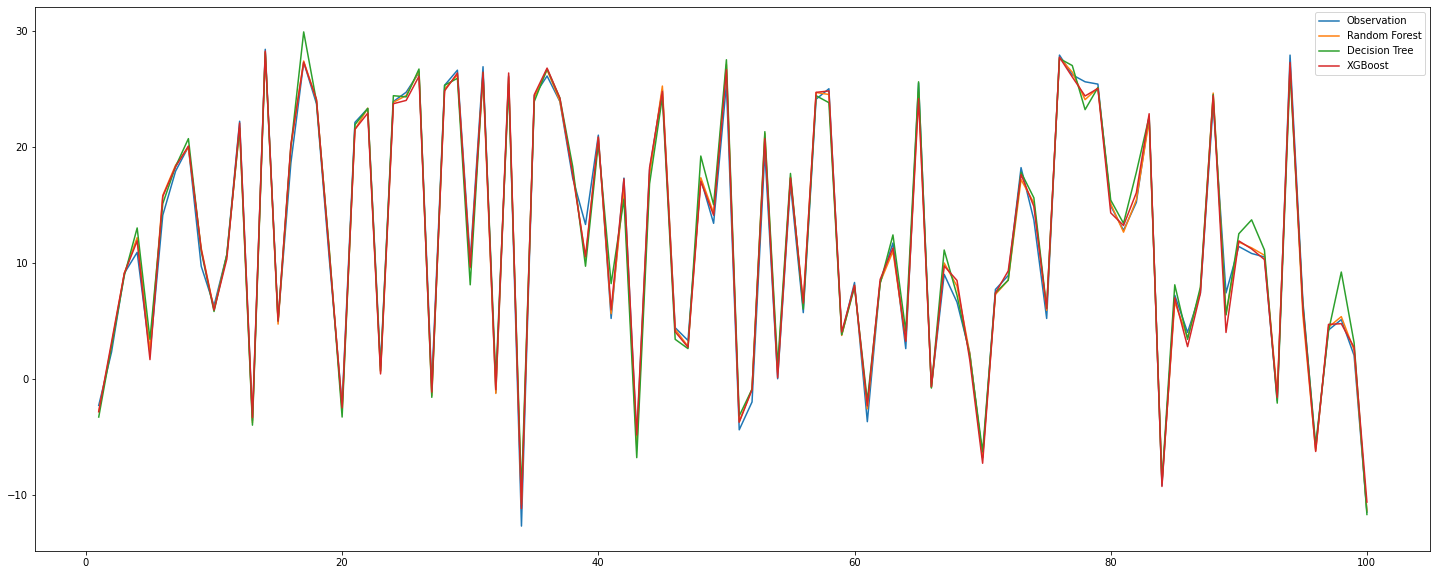

In [30]:
F1=test_y[0:100]
F2=prediction[0:100]
F3=prediction2[0:100]
F4=prediction3[0:100]
plt.figure(figsize=(25,10))
plt.plot(np.arange(1,101),F1,label = "Observation")
plt.plot(np.arange(1,101),F2,label = "Random Forest")
plt.plot(np.arange(1,101),F3,label = "Decision Tree")
plt.plot(np.arange(1,101),F4,label = "XGBoost")
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x269a9c7e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x269a9c7ea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x269a9c7e1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x269a973c040>,
 'fliers': [<matplotlib.lines.Line2D at 0x269a973c310>,
 'means': []}

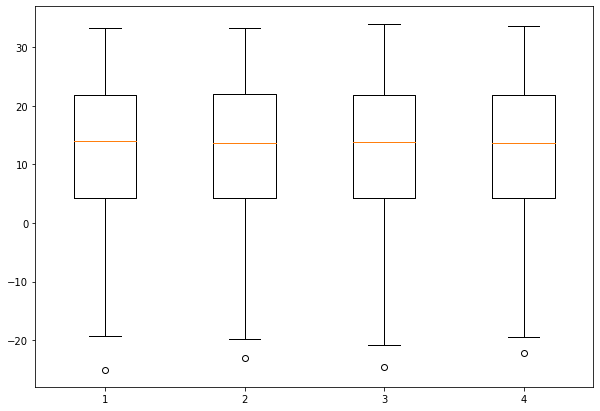

In [31]:
data = [test_y, prediction, prediction2, prediction3]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)